# 1. Preparation

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# Create face_cascade and eye_cascade objects
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')  # Detect a face
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')                   # Detect eyes

face_cascade, eye_cascade

(<CascadeClassifier 00000205A5A88950>, <CascadeClassifier 0000020585704FD0>)

# 2. Load an Image

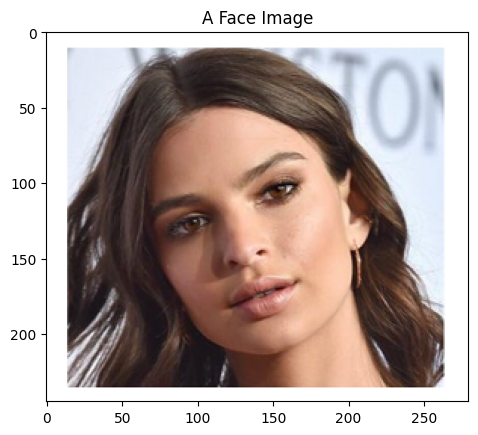

In [4]:
# Load an image
image_path = './data/face1.png'
image = cv2.imread(image_path, 1)

# Covnvert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualization
plt.imshow(image)
plt.title('A Face Image')
plt.show()


# 3. Add a Rounding Box

- Cascade: Only works for gray scale images

Axises for the face:  49 48 161 161


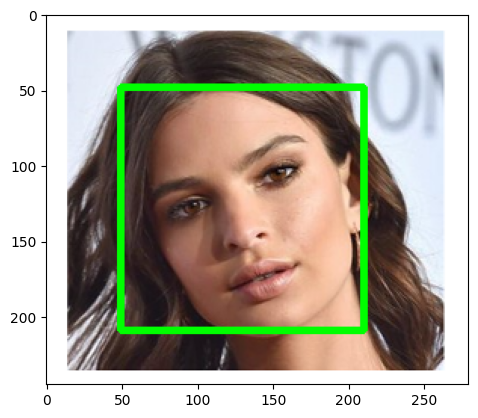

In [5]:
# Convert to RFB to GRAY
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(image_gray, 
                                      1.1,  # Scale factor
                                      4)

# Detect axises for bounding boxes: `detectMultiScale()`
for (x, y, w, h) in faces:
    print('Axises for the face: ', x, y, w, h)
    cv2.rectangle(image, 
                  (x, y),         # Top-Left corner
                  (x+w, y+h),     # Botton-Right corner
                  (0, 255, 0), 3) # Color of the rectangle

# Visualizaion
plt.imshow(image)
plt.show()

# 4. Detect Eyes

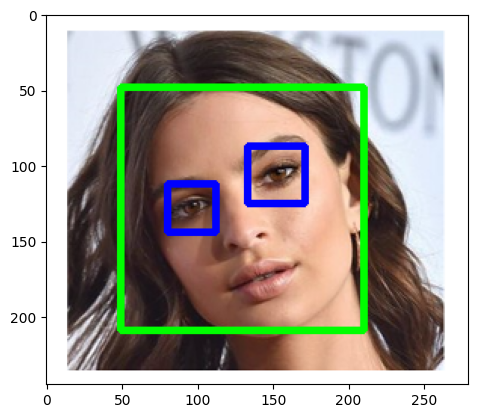

In [7]:
roi_gray = image_gray[y: (y+h), x:(x+w)]
roi_color = image[y:(y+h), x:(x+w)]
#roi_gray, roi_color

# Create variable eyes
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
index = 0

for (ex, ey, ew, eh) in eyes:
    if index == 0:
        eye_1 = (ex, ey, ew, eh)
    elif index == 1:
        eye_2 = (ex, ey, ew, eh)
        
    # Draw rectangles around the eyes
    cv2.rectangle(roi_color, 
                  (ex, ey),
                  (ex+ew, ey+eh),
                  (0, 0, 255),
                  3)
    index = index + 1
    
# Visualization
plt.imshow(image)
plt.show()

In [8]:
# Set left and right eyes
# Based on the image, the right eye is bigger than the left eye
if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1
    
print('Left Eye: ', left_eye)
print('Right Eye: ', right_eye)

Left Eye:  (31, 64, 32, 32)
Right Eye:  (84, 39, 38, 38)


# 5. Calculate Locations of the Eyes

In [9]:
# Calculate coordinates for Left eye
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)),
                   int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0]
left_eye_y = left_eye_center[1]

print('Left Eye: ', left_eye_x, ', ', left_eye_y)

# Calculate coordinates for Right eye
right_eye_center = (int(right_eye[0] + (right_eye[2] / 2)),
                   int(right_eye[1] + (right_eye[3] / 2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

print('Right Eye: ', right_eye_x, ', ', right_eye_y)

Left Eye:  47 ,  80
Right Eye:  103 ,  58


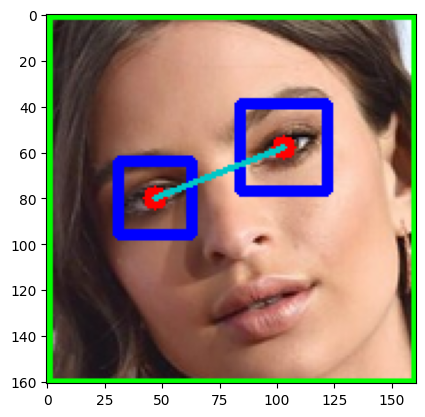

In [10]:
# Add circles on the center of eyes
cv2.circle(roi_color, left_eye_center, 5, (255, 0, 0), -1)
cv2.circle(roi_color, right_eye_center, 5, (255, 0, 0), -1)

# Add a line between the centers
cv2.line(roi_color, right_eye_center, left_eye_center, (0, 200, 200), 2)

# Visualization
plt.imshow(roi_color)
plt.show()

# 6. Calcualte the Angle between Eyes

In [11]:
# Calcualte the angles
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
    direction = -1
else:
    A = (right_eye_x, left_eye_y)
    direction = 1

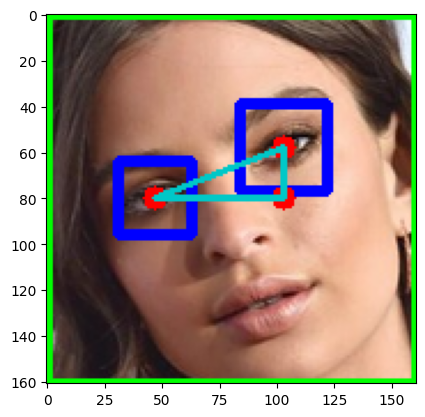

In [12]:
# Add additional circle to draw a triangle
cv2.circle(roi_color, A, 5, (255, 0, 0), -1)

# Add lines
cv2.line(roi_color, right_eye_center, left_eye_center, (0, 200, 200), 2)
cv2.line(roi_color, right_eye_center, A, (0, 200, 200), 2)
cv2.line(roi_color, left_eye_center, A, (0, 200, 200), 2)

# Visualization
plt.imshow(roi_color)
plt.show()

# 7. Calculate the Rotation Angle

In [13]:
# Get values of delta
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y

# Calculate anlgles
angle = np.arctan(delta_y / delta_x)
angle = (angle * 180) / np.pi

angle

-21.447736327105353

# 8. Rotate the Image

In [15]:
# Calcualte the center
height, width, _ = image.shape

center = (width // 2, height // 2)

center

(140, 122)

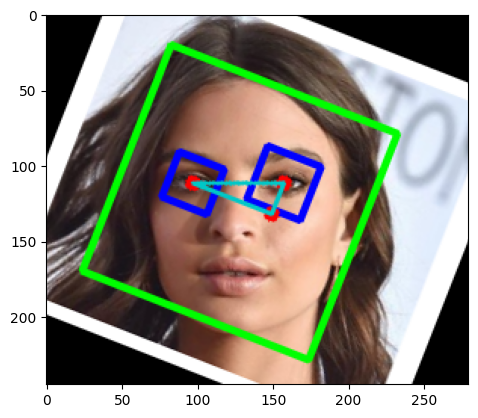

In [18]:
# Rotate the image
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
#M

rotated = cv2.warpAffine(image, M, (width, height))

# Visualization
plt.imshow(rotated)
plt.show()